## Precept 9: Krylov subspace methods

Task 1: Let $A \in \mathbb{R}^{m\times m}$ Compute a basis for the Krylov subspace:

$$K_n(A,b) = \{b, Ab, A^2b, \dots, A^{n-1}b \} $$

using the Arnoldi iteration. Your function in Arnoldi step should do one step of the Arnoldi iteration, and fit into the (already written) Arnoldi iteration.

Recall the Arnoldi iteration:
![gs1](arnoldi.png)



error in AQn - QnHn 0.0
error in Hessenberg 10.2384175355767


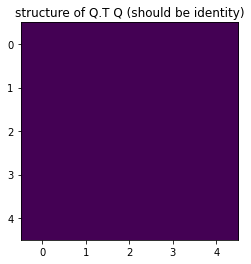

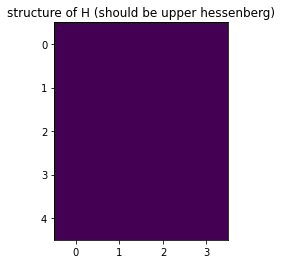

In [ ]:
import numpy as np

def Arnoldi_step(Qn, Hnm1, A):
    # Given Qn, Hnm1 such that AQn = Qnm1 Hnm1
    # Computes the next Qnp1 and Hn so that AQnp1 = Qn

    m = Qn.shape[0]
    n = Qn.shape[1]

    Qnp1 = np.zeros((m,n+1))
    Hn = np.zeros((n+1,n))

    ## ADD YOUR CODE HERE

    return Qnp1, Hn


### Written for you.
def Arnoldi_iteration(A,b, n):
    Qnp1 = b[:,None].copy()  #Trick to add a dimension to Qnp1
    Qnp1 /=  np.linalg.norm(b)
    Hn = np.zeros((0,0))
    for i in range(1,n):
        Qnp1,Hn = Arnoldi_step(Qnp1, Hn, A)
    return Qnp1, Hn


## Test cases
m = 10
A = np.random.randn(m,m)
b = np.random.randn(m)


# If we run m iteration, we should get AQn = Qn+1 Hn
n = 5
Qnp1, Hn = Arnoldi_iteration(A,b,n)

import matplotlib.pyplot as plt
plt.imshow(Qnp1.T@Qnp1)
plt.title('structure of Q.T Q (should be identity)')
plt.figure()
plt.imshow(Hn)
plt.title('structure of H (should be upper hessenberg)')


print('error in AQn - QnHn', np.linalg.norm(A@Qnp1[:,:-1] - Qnp1 @ Hn ) )

# If we run m + 1 iteration, we should get a reduction to Upper Hessenberg:
# (Although doesn't work for large n)
Q, H = Arnoldi_iteration(A,b,m+1)
Q = Q[:,:m]
H = H[:m]
A_recon = Q@H@Q.T
print('error in Hessenberg', np.linalg.norm(A - A_recon))


## Task 2: GMRES

Using your Arnoldi step function, write a GMRES solver:

![gs1](gmres.png)


Also compute the residual at each step and return it along with the last iterate.
Although step n of GMRES can be computed in O(n^2), you can use a O(n^3) solver for the QR factorization (use `np.linalg.qr')

error (should be 0 since n iter == m): 1.0
error after 50 iterations (should not be 0): 1.0


Text(0, 0.5, 'residual')

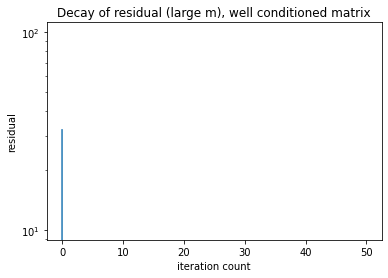

In [3]:


def GMRES(A,b, n_iter):

    Qnp1 = b / np.linalg.norm(b)
    Qnp1 = Qnp1[:,None] # Add a dimension to Qnp1
    Hn = 0 

    # Store residuals in here
    residuals = np.zeros(n_iter+1)
    residuals[0] = np.linalg.norm(b)
    x = np.zeros_like(b)
    for k in range(1,n_iter+1):
        x
        ## WRITE THE GMRES ITERATION HERE

    return x, residuals



m = 10
A = np.random.randn(m,m)
b = np.random.randn(m)

# Should be exact after m steps
xm,r = GMRES(A,b, m)
x_sol = np.linalg.solve(A,b)
print('error (should be 0 since n iter == m):', np.linalg.norm(xm - x_sol) / np.linalg.norm(x_sol))

# A large matrix, we want to step well before n_iter === m
m = 1000
A = np.random.randn(m,m)
A = A.T @A + np.eye(m) * 1e3 # A well conditioned matrix
b = np.random.randn(m)

# Should be exact after m steps
n_iter = 50
xm,r = GMRES(A,b, n_iter)
x_sol = np.linalg.solve(A,b)
print('error after 50 iterations (should not be 0):', np.linalg.norm(xm - x_sol) / np.linalg.norm(x_sol))

plt.figure()
plt.semilogy(r)
plt.title('Decay of residual (large m), well conditioned matrix')
plt.xlabel('iteration count')
plt.ylabel('residual')
